In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
dataset = pd.read_csv(r"/content/index.csv")
dataset.head(10)

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte
5,2024-03-01,2024-03-01 15:39:47.726,card,ANON-0000-0000-0005,33.8,Americano with Milk
6,2024-03-01,2024-03-01 16:19:02.756,card,ANON-0000-0000-0006,38.7,Hot Chocolate
7,2024-03-01,2024-03-01 18:39:03.580,card,ANON-0000-0000-0007,33.8,Americano with Milk
8,2024-03-01,2024-03-01 19:22:01.762,card,ANON-0000-0000-0008,38.7,Cocoa
9,2024-03-01,2024-03-01 19:23:15.887,card,ANON-0000-0000-0008,33.8,Americano with Milk


In [ ]:
dataset.isnull().sum()                                                                                                       # to check null values

,0
date,0
datetime,0
cash_type,0
card,0
money,0
coffee_name,0


In [ ]:
dataset.shape                                                                                                                                         #to check no of rows and columns

(1133, 6)

In [ ]:
dataset.info()                                                                                                                                          # to check data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1133 non-null   object 
 1   datetime     1133 non-null   object 
 2   cash_type    1133 non-null   object 
 3   card         1133 non-null   object 
 4   money        1133 non-null   float64
 5   coffee_name  1133 non-null   object 
dtypes: float64(1), object(5)
memory usage: 53.2+ KB


In [ ]:
dataset["card"].mode()[0]                                                                                                       # most frequently occuring value(mode) in value "card"

'ANON-0000-0000-0012'

In [ ]:
dataset[dataset["cash_type"]== "cash"]["cash_type"].count()                                                               # null values is because who pays cash they dont have any card number

89

In [ ]:
dataset['card'].fillna(dataset['card'].mode()[0], inplace=True)                                           # fill null values with mode


<ipython-input-12-fea05ed7b60d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['card'].fillna(dataset['card'].mode()[0], inplace=True)                                           # fill null values with mode


In [ ]:
dataset['date']= pd.to_datetime(dataset['date'], errors= 'coerce')                                       #correct order of date
dataset['date'] = dataset['date'].dt.strftime('%d-%m-%Y')
dataset.head(3)

,date,datetime,cash_type,card,money,coffee_name
0,01-03-2024,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,01-03-2024,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,01-03-2024,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate


In [ ]:
dataset.describe()                                                                                                                                   #statistical values

,money
count,1133.000000
mean,33.105808
std,5.035366
min,18.120000
25%,28.900000
50%,32.820000
75%,37.720000
max,40.000000


In [ ]:
dataset.loc[:,['cash_type', 'card', 'coffee_name']].describe().T                                                 #.loc - access to select rows and columns. # : - select all rows in dataframe.
                                                                                                                     # ['cash_type', 'card', 'coffee_name'] - select all columns in dataframe.

,count,unique,top,freq
cash_type,1133,2,card,1044
card,1044,446,ANON-0000-0000-0012,88
coffee_name,1133,8,Americano with Milk,268


In [ ]:
#Based on this, we can conclude that
# Americano with Milk is the most ordered coffee
# Customers tend to pay with card
# The customer who visited the most is the person with card number 0012


In [ ]:
pd.DataFrame(dataset["coffee_name"].value_counts(normalize=True).sort_values(ascending=False).round(4)*100)

,proportion
coffee_name,
Americano with Milk,23.65
Latte,21.45
Cappuccino,17.30
Americano,14.92
Cortado,8.74
Hot Chocolate,6.53
Espresso,4.32
Cocoa,3.09


In [ ]:
dataset['month'] = pd.to_datetime(dataset['date'], errors = 'coerce').dt.month
monthly_sales = dataset.groupby(['coffee_name','month']).count()['date'].reset_index().rename(columns={'date':'count'}).pivot(index='month',columns='coffee_name',values='count').reset_index()
monthly_sales

coffee_name,month,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
0,1.0,2.0,12.0,5.0,3.0,1.0,1.0,4.0,4.0
1,2.0,7.0,11.0,4.0,NaN,1.0,NaN,NaN,7.0
2,3.0,2.0,8.0,5.0,1.0,4.0,1.0,2.0,10.0
3,4.0,1.0,7.0,3.0,NaN,4.0,1.0,2.0,7.0
4,5.0,7.0,6.0,4.0,4.0,4.0,3.0,4.0,7.0
5,6.0,7.0,8.0,8.0,NaN,3.0,NaN,NaN,9.0
6,7.0,2.0,7.0,10.0,3.0,5.0,2.0,4.0,6.0
7,8.0,7.0,6.0,6.0,NaN,2.0,1.0,NaN,6.0
8,9.0,9.0,9.0,9.0,NaN,3.0,2.0,5.0,9.0
9,10.0,2.0,4.0,2.0,NaN,1.0,3.0,3.0,10.0


In [ ]:
monthly_sales.describe().T.loc[:,['min', 'max']]

,min,max
coffee_name,,
Americano,3.0,19.0
Americano with Milk,11.0,29.0
Cappuccino,8.0,18.0
Cocoa,1.0,3.0
Cortado,1.0,10.0
Espresso,0.0,5.0
Hot Chocolate,0.0,14.0
Latte,12.0,26.0


In [ ]:
#VISUALISATION


<ipython-input-23-f5d5d9397d95>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_sales, x='month', y='money', palette='Blues_d')


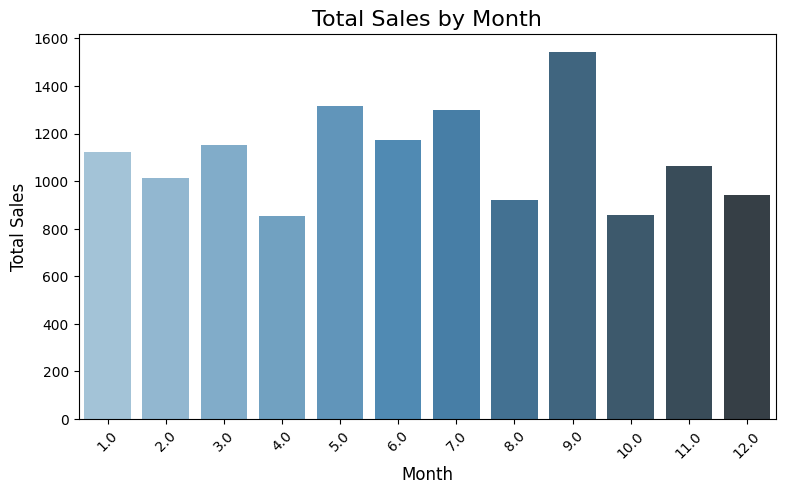

In [ ]:
monthly_sales = dataset.groupby('month')['money'].sum().reset_index()

#plot
plt.figure(figsize=(9,5))
sns.barplot(data=monthly_sales, x='month', y='money', palette='Blues_d')
plt.title('Total Sales by Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)
plt.show()

<ipython-input-66-5098e2f0a452>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=day_sales, x='day_of_week', y='money', order=day_order, palette="Greens_d")


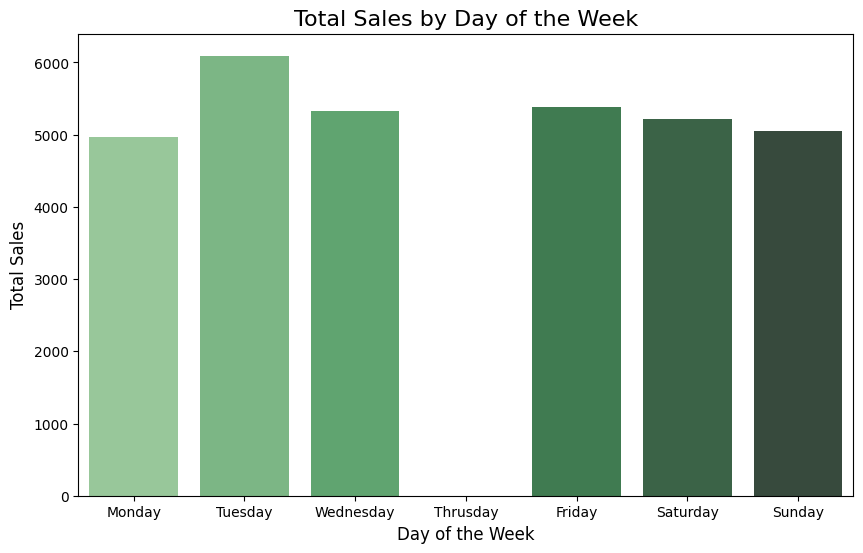

In [ ]:
#SALES BY DAY OF THE WEEK
if 'day_of_week' not in dataset.columns:
    dataset['day_of_week'] = dataset['date'].dt.day_name()
day_sales = dataset.groupby('day_of_week')['money'].sum().reset_index()
day_order = ["Monday", "Tuesday", "Wednesday", "Thrusday", "Friday", "Saturday", "Sunday"]

plt.figure(figsize=(10,6))
sns.barplot(data=day_sales, x='day_of_week', y='money', order=day_order, palette="Greens_d")
plt.title('Total Sales by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.show()


<ipython-input-67-3f3b8b768ec9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= coffee_sales, x='money', y='coffee_name', palette='coolwarm')


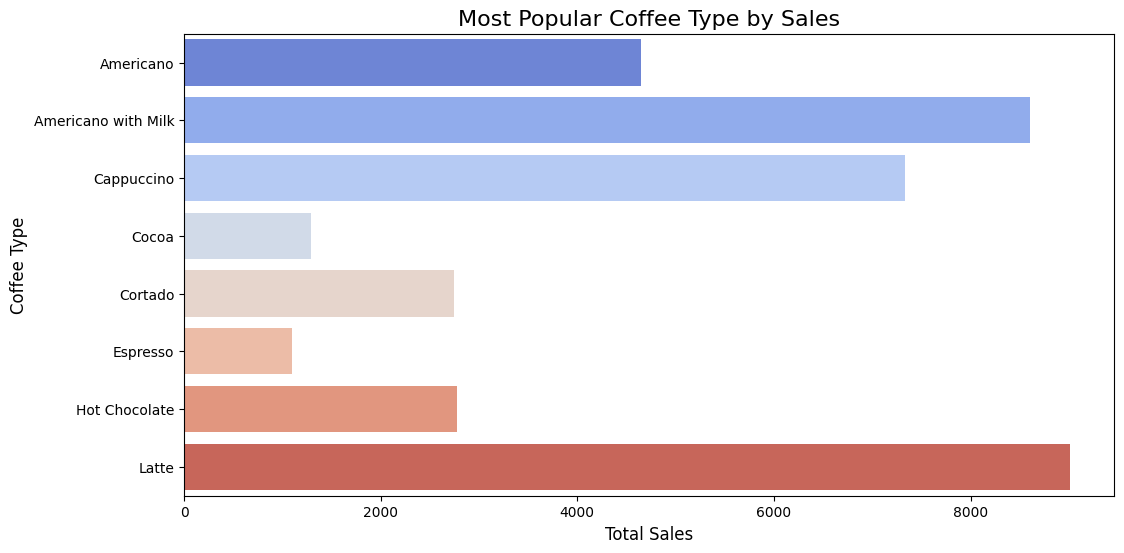

In [ ]:
coffee_sales = dataset.groupby('coffee_name')['money'].sum().reset_index()
plt.figure(figsize=(12,6))
sns.barplot(data= coffee_sales, x='money', y='coffee_name', palette='coolwarm')
plt.title('Most Popular Coffee Type by Sales', fontsize=16)
plt.xlabel('Total Sales', fontsize=12)
plt.ylabel('Coffee Type', fontsize=12)
plt.show()

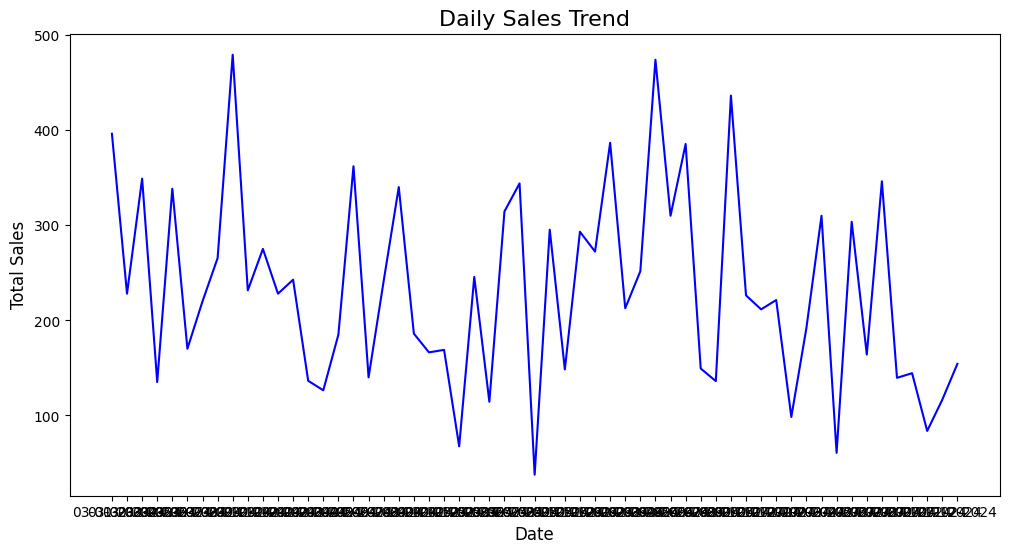

In [ ]:
daily_sales = dataset.groupby('date')['money'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=daily_sales,x='date', y='money', color='blue')
plt.title('Daily Sales Trend', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.show()

<ipython-input-69-ea2579dd56d6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=payment_counts, x='Payment Type', y='Count', palette='muted')


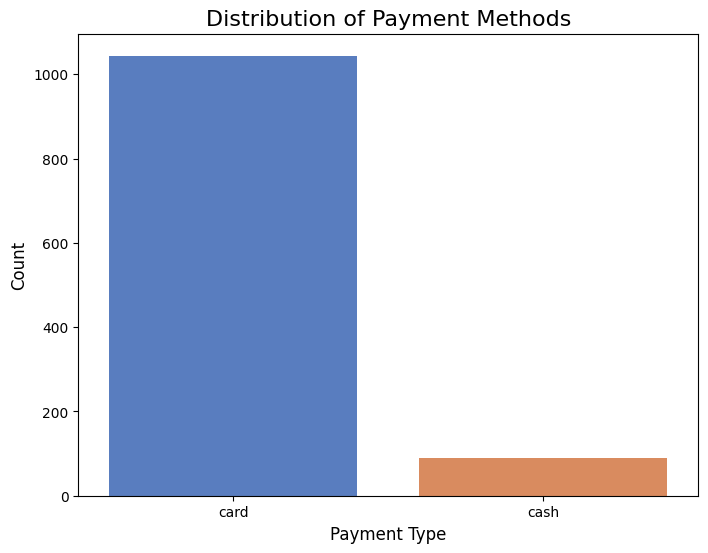

In [ ]:
payment_counts= dataset['cash_type'].value_counts().reset_index()
payment_counts.columns = ['Payment Type', 'Count']

plt.figure(figsize=(8,6))
sns.barplot(data=payment_counts, x='Payment Type', y='Count', palette='muted')
plt.title('Distribution of Payment Methods', fontsize=16)
plt.xlabel('Payment Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

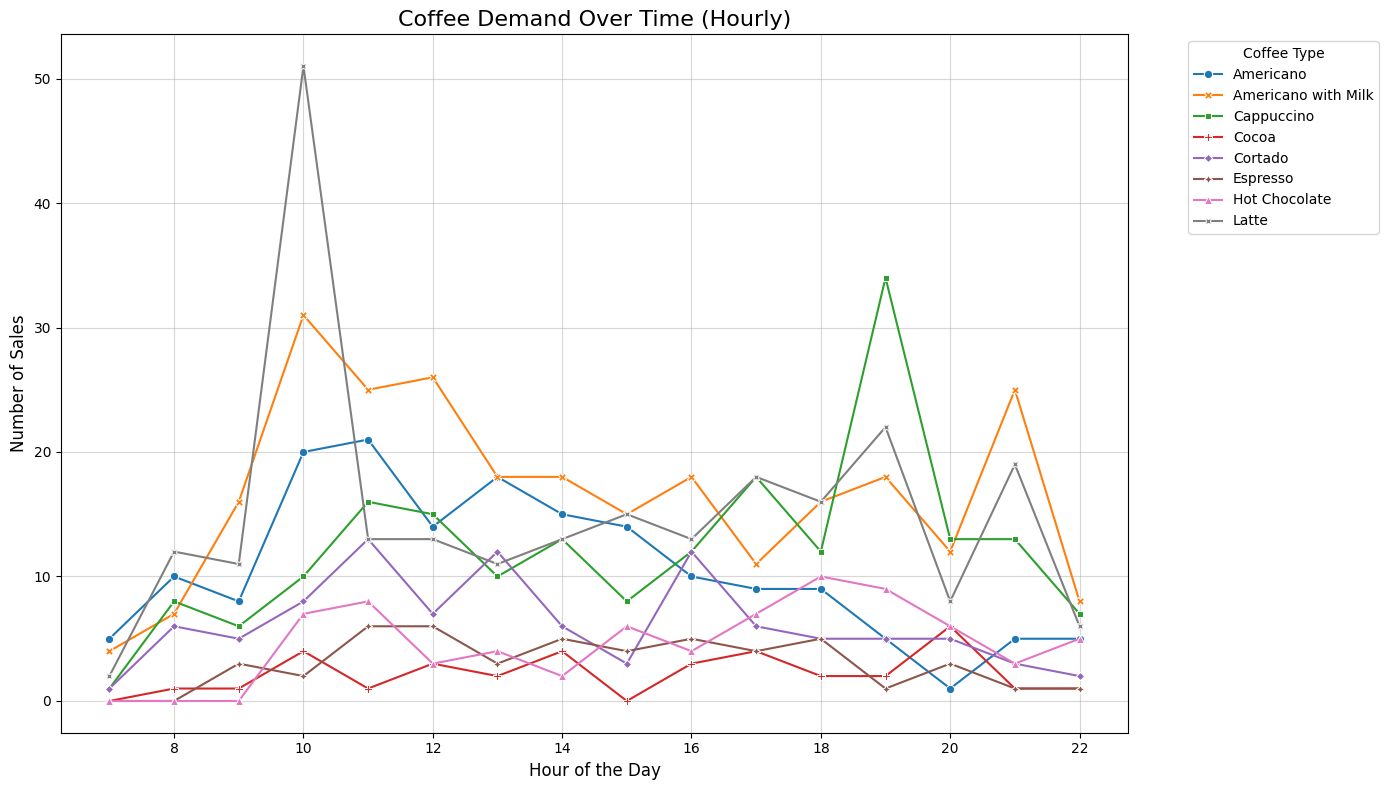

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'datetime' column to datetime type for manipulation
dataset['datetime'] = pd.to_datetime(dataset['datetime'])

# Extract relevant time components
dataset['hour'] = dataset['datetime'].dt.hour
dataset['date'] = dataset['datetime'].dt.date

# Group the data by time intervals (e.g., hourly) and coffee type
coffee_demand = dataset.groupby(['hour', 'coffee_name']).size().reset_index(name='sales')

# Pivot the table for better visualization (coffee types as columns)
coffee_pivot = coffee_demand.pivot(index='hour', columns='coffee_name', values='sales').fillna(0)

# Plot the demand of each coffee type over time intervals
plt.figure(figsize=(14, 8))
sns.lineplot(data=coffee_pivot, markers=True, dashes=False)
plt.title('Coffee Demand Over Time (Hourly)', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Sales', fontsize=12)
plt.legend(title='Coffee Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
# Define the time intervals
def get_time_interval(hour):
    if 10 <= hour < 12:
        return '10-12'
    elif 12 <= hour < 14:
        return '12-2'
    elif 14 <= hour < 16:
        return '2-4'
    elif 16 <= hour < 18:
        return '4-6'
    elif 18 <= hour < 20:
        return '6-8'
    else:
        return 'Other'

# Add a column for time intervals
dataset['time_interval'] = dataset['datetime'].dt.hour.apply(get_time_interval)

# Group data by time interval and coffee type, and count the sales
coffee_demand_intervals = dataset.groupby(['time_interval', 'coffee_name']).size().reset_index(name='sales')

# Identify the coffee with the highest sales in each time interval
most_sold_coffee = coffee_demand_intervals.loc[
    coffee_demand_intervals.groupby('time_interval')['sales'].idxmax()
]

# Display the result
print("Most sold coffee in each time interval:")
print(most_sold_coffee)


Most sold coffee in each time interval:
   time_interval          coffee_name  sales
7          10-12                Latte     64
9           12-2  Americano with Milk     44
17           2-4  Americano with Milk     33
31           4-6                Latte     31
34           6-8           Cappuccino     46
41         Other  Americano with Milk     72
